In [262]:
#Импорт файла (метод можно поменять)
from google.colab import drive
import os

drive.mount('/content/gdrive')

os.chdir(r'/content/gdrive/MyDrive/Data/LAB_3_8')
os.listdir()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['LAB_3_8_constants.csv',
 'LAB_3_8_base.csv',
 'Основные_кривые_намагничивания.png',
 'Зависимость_магнитной_проницаемости_μ_от_напряжённости_магнитного_поля_H.png',
 'LAB_3_8_base_task2.gsheet',
 'LAB_3_8_base_task2.csv']

In [263]:
import numpy as np
from numpy import sqrt
import pandas as pd
import matplotlib.pyplot as plt

In [264]:
#Распаковка и преобразование основных данных
df = pd.read_csv('LAB_3_8_base.csv')
df = df.replace(',', '.', regex=True)
df[['hx+','hx-','hy+','hy-','kx','ky','length']] = df[['hx+','hx-','hy+','hy-','kx','ky','length']].astype(float)

#Распаковка и преобразование констант
df_const = pd.read_csv('LAB_3_8_constants.csv')
df_const.set_index('Name', inplace=True)
df_const = df_const.replace(',', '.', regex=True)
df_const[['Constants', 'Error']] = df_const[['Constants', 'Error']].astype(float)

#Введение μ0
mu0 = 4 * np.pi * (10 ** -7)

df_const

,Constants,Error
Name,,
R,5800.000000,1.000000e+02
C,0.000035,2.000000e-07
R_e,2.500000,3.000000e-01
d1,0.006000,NaN
d2,0.012000,NaN
N,1000.000000,NaN
l1,0.275000,5.000000e-03
N1,2310.000000,1.000000e+01
d,0.002000,1.000000e-04


In [265]:
#Подсчёт hx и hy
df['hx'] = df[['hx+', 'hx-']].mean(axis=1)
df['hy'] = df[['hy+', 'hy-']].mean(axis=1)

In [266]:
#Подсчёт m_h и m_b
m_h = ((df_const.loc['N1', 'Constants'])
      / (df_const.loc['R_e', 'Constants'] * df_const.loc['l1', 'Constants']))
dm_h = sqrt(
    (
        df_const.loc['N1', 'Error']
        / (df_const.loc['l1', 'Constants'] * df_const.loc['R_e', 'Constants'])
    ) ** 2
    + (
        (df_const.loc['N1', 'Constants'] * df_const.loc['l1', 'Error'])
        / (df_const.loc['R_e', 'Constants'] * (df_const.loc['l1', 'Constants'] ** 2))
    ) ** 2
    + (
        (df_const.loc['N1', 'Constants'] * df_const.loc['R_e', 'Error'])
        / (df_const.loc['l1', 'Constants'] * (df_const.loc['R_e', 'Constants']) ** 2)
    ) ** 2
)
S0 = np.pi * (df_const['Constants']['d'] ** 2) / 4
m_b = (df_const['Constants']['R'] * df_const['Constants']['C']) / (df_const['Constants']['N'] * S0)
dm_b = 4 * sqrt(
    (
        df_const.loc['C', 'Constants'] * df_const.loc['R', 'Error']
        / (df_const.loc['N', 'Constants'] * (df_const.loc['d', 'Constants'] ** 2))
    ) ** 2
    + (
        (df_const.loc['R', 'Constants'] * df_const.loc['C', 'Error'])
        / (df_const.loc['N', 'Constants'] * (df_const.loc['d', 'Constants'] ** 2))
    ) ** 2
    + (
        (2 * df_const.loc['R', 'Constants'] * df_const.loc['C', 'Constants'] * df_const.loc['d', 'Error'])
         / (df_const.loc['N', 'Constants'] * (df_const.loc['d', 'Constants'] ** 3))
    ) ** 2
) / np.pi
m_h

np.float64(3360.0)

In [267]:
#Подсчёт H и dH
df['H'] = df['kx'] * df['hx'] * m_h
df['H_error'] = df['kx'] * sqrt((0.1 * m_h) ** 2 + (df['hx'] * dm_h) ** 2)

In [268]:
#Подсчёт В и dB
df['B'] = m_b * df['ky'] * df['hy']
df['B_error'] = df['ky'] * sqrt((0.1 * m_b) ** 2 + (df['hy'] * dm_b) ** 2)

In [269]:
df['mu'] = df['B'] / (mu0 * df['H'])
df['mu_error'] = sqrt(
    (df['B_error'] / df['H']) ** 2
    + (df['B'] * df['H_error'] / (df['H'] ** 2)) ** 2
) / mu0
df

,hx+,hx-,hy+,hy-,hx,hy,kx,ky,H,H_error,B,B_error,length,mu,mu_error
0,2.6,2.4,2.0,2.0,2.5,2.0,0.2,0.005,1680.0,214.812284,0.646169,0.073191,1.0,306.074409,52.283420
1,2.8,3.2,0.8,0.8,3.0,0.8,0.1,0.005,1008.0,126.945704,0.258468,0.041641,1.0,204.049606,41.725699
2,3.4,3.2,2.8,2.8,3.3,2.8,0.2,0.005,2217.6,277.577555,0.904637,0.097455,1.0,324.624373,53.610239
3,4.8,4.6,3.8,3.2,4.7,3.5,0.2,0.005,3158.4,389.419479,1.130796,0.119385,1.0,284.909689,46.246957
4,2.4,2.4,2.0,2.0,2.4,2.0,0.5,0.010,4032.0,517.691056,1.292338,0.146382,1.0,255.062007,43.671017
5,3.2,2.8,2.2,2.2,3.0,2.2,0.5,0.010,5040.0,634.728522,1.421572,0.158274,1.0,224.454567,37.730047
6,3.2,3.2,2.2,2.4,3.2,2.3,0.5,0.010,5376.0,674.165861,1.486189,0.164291,1.0,219.990981,36.776123
7,2.8,3.0,2.6,2.4,2.9,2.5,0.2,0.005,1948.8,246.030728,0.807711,0.088222,1.0,329.821561,55.059754
8,4.0,4.0,0.8,0.8,4.0,0.8,0.1,0.005,1344.0,166.646889,0.258468,0.041641,0.0,153.037204,31.111842
9,2.4,3.0,1.2,1.2,2.7,1.2,0.2,0.005,1814.4,230.372082,0.387701,0.050956,0.0,170.041338,31.074059


In [270]:
#Итогое форматирование перед постройкой графиков
df = df.sort_values(['length', 'H'])

/tmp/ipython-input-1792645378.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-b" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(
/tmp/ipython-input-1792645378.py:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-r" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(


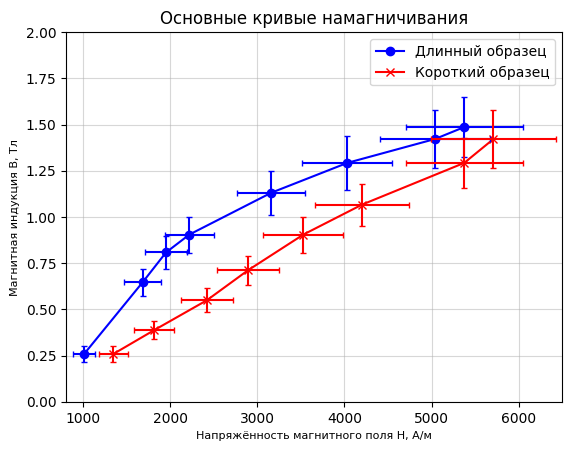

In [271]:
#Построение кривых намагничивания
plt.title('Основные кривые намагничивания')
plt.xlabel('Напряжённость магнитного поля Н, А/м', fontsize=8.)
plt.ylabel('Магнитная индукция B, Тл', fontsize=8.)

plt.xlim(800, 6500)
plt.ylim(0, 2)

plt.plot(df.loc[df['length'] == 1, 'H'], df.loc[df['length'] == 1, 'B'], '-b', marker='o', label='Длинный образец')
plt.plot(df.loc[df['length'] == 0, 'H'], df.loc[df['length'] == 0, 'B'], '-r', marker='x', label='Короткий образец')
plt.errorbar(
    df.loc[df['length'] == 1, 'H'], df.loc[df['length'] == 1, 'B'],
    df.loc[df['length'] == 1, 'B_error'], df.loc[df['length'] == 1, 'H_error'],
    '-b', capsize = 2, linestyle = ''
    )
plt.errorbar(
    df.loc[df['length'] == 0, 'H'], df.loc[df['length'] == 0, 'B'],
    df.loc[df['length'] == 0, 'B_error'], df.loc[df['length'] == 0, 'H_error'],
    '-r', capsize = 2, linestyle = ''
    )

plt.grid(axis = 'x')
plt.legend(loc = 'best')
plt.grid(alpha = 0.5)
plt.savefig('Основные_кривые_намагничивания.png')
plt.show()

/tmp/ipython-input-978679340.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-b" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(
/tmp/ipython-input-978679340.py:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-r" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(


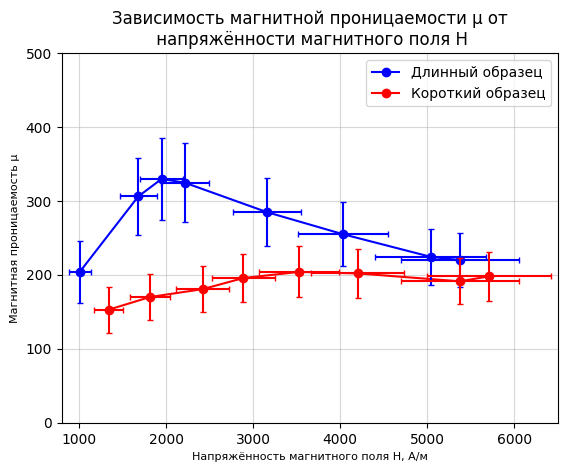

In [272]:
#Зависимость проницаемости от напряжённости
plt.title('Зависимость магнитной проницаемости μ от\n напряжённости магнитного поля H')
plt.xlabel('Напряжённость магнитного поля Н, А/м', fontsize=8.)
plt.ylabel('Магнитная проницаемость μ', fontsize=8.)

plt.xlim(800, 6500)
plt.ylim(0, 500)

plt.plot(df.loc[df['length'] == 1, 'H'], df.loc[df['length'] == 1, 'mu'], '-b', marker='o', label='Длинный образец')
plt.plot(df.loc[df['length'] == 0,'H'], df.loc[df['length'] == 0, 'mu'], '-r', marker='o', label='Короткий образец')
plt.errorbar(
    df.loc[df['length'] == 1, 'H'], df.loc[df['length'] == 1, 'mu'],
    df.loc[df['length'] == 1, 'mu_error'], df.loc[df['length'] == 1, 'H_error'],
    '-b', capsize = 2, linestyle = ''
    )
plt.errorbar(
    df.loc[df['length'] == 0, 'H'], df.loc[df['length'] == 0, 'mu'],
    df.loc[df['length'] == 0, 'mu_error'], df.loc[df['length'] == 0, 'H_error'],
    '-r', capsize = 2, linestyle = ''
    )

plt.grid(axis = 'x')
plt.legend(loc = 'best')
plt.grid(alpha = 0.5)
plt.savefig('Зависимость_магнитной_проницаемости_μ_от_напряжённости_магнитного_поля_H.png')
plt.show()

In [273]:
#Распаковка данных для задания 2
df2 = pd.read_csv('LAB_3_8_base_task2.csv')
df2 = df2.replace(',', '.', regex=True)
df2[['hy+', 'hy-', 'hx', 'ky', 'kx', 'length']] = df2[['hy+', 'hy-', 'hx', 'ky', 'kx', 'length']].astype(float)
df2

,hy+,hy-,hx,kx,ky,H,H_error,B-,B-_error,B+,B+_error,length
0,3.4,3.4,4.0,0.2,0.005,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,3.0,2.2,3.0,0.2,0.005,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2.8,1.2,2.0,0.2,0.005,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2.4,-0.2,1.0,0.2,0.005,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1.6,-1.6,0.0,0.2,0.005,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,0.4,-2.0,-1.0,0.2,0.005,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,-1.2,-2.8,-2.0,0.2,0.005,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,-2.4,-3.0,-3.0,0.2,0.005,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,-3.4,-3.4,-4.0,0.2,0.005,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,1.8,1.8,4.0,0.2,0.005,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [274]:
#Подсчёт H и dH
df2['H'] = df2['kx'] * df2['hx'] * m_h
df2['H_error'] = df2['kx'] * sqrt(
    (0.1 * m_h) ** 2
    + (df2['hx'] * dm_h) ** 2
)

#Подсчёт B- и dB-
df2['B-'] = df2['ky'] * df2['hy-'] * m_b
df2['B-_error'] = df2['ky'] * sqrt(
    (0.1 * m_b) ** 2
    + (df2['hy-'] * dm_b) ** 2
)

#Подсчёт B+ и dB+
df2['B+'] = df2['ky'] * df2['hy+'] * m_b
df2['B+_error'] = df2['ky'] * sqrt(
    (0.1 * m_b) ** 2
    + (df2['hy+'] * dm_b) ** 2
)
df2

,hy+,hy-,hx,kx,ky,H,H_error,B-,B-_error,B+,B+_error,length
0,3.4,3.4,4.0,0.2,0.005,2688.0,333.293777,1.098487,0.116227,1.098487,0.116227,1.0
1,3.0,2.2,3.0,0.2,0.005,2016.0,253.891409,0.710786,0.079137,0.969254,0.103674,1.0
2,2.8,1.2,2.0,0.2,0.005,1344.0,176.516474,0.387701,0.050956,0.904637,0.097455,1.0
3,2.4,-0.2,1.0,0.2,0.005,672.0,105.718477,-0.064617,0.032969,0.775403,0.085175,1.0
4,1.6,-1.6,0.0,0.2,0.005,0.0,67.200000,-0.516935,0.061678,0.516935,0.061678,1.0
5,0.4,-2.0,-1.0,0.2,0.005,-672.0,105.718477,-0.646169,0.073191,0.129234,0.034876,1.0
6,-1.2,-2.8,-2.0,0.2,0.005,-1344.0,176.516474,-0.904637,0.097455,-0.387701,0.050956,1.0
7,-2.4,-3.0,-3.0,0.2,0.005,-2016.0,253.891409,-0.969254,0.103674,-0.775403,0.085175,1.0
8,-3.4,-3.4,-4.0,0.2,0.005,-2688.0,333.293777,-1.098487,0.116227,-1.098487,0.116227,1.0
9,1.8,1.8,4.0,0.2,0.005,2688.0,333.293777,0.581552,0.067361,0.581552,0.067361,0.0


In [275]:
#Подсчёт площадей
S1 = (
    (df2.loc[df2['length'] == 1, 'hx'].iloc[0] - df2.loc[df2['length'] == 1, 'hx'].iloc[1])
    * (df2.loc[df2['length'] == 1, 'hy+'].sum() - df2.loc[df2['length'] == 1, 'hy-'].sum())
)
dS1 = sqrt(
    (0.1 * (df2.loc[df2['length'] == 1, 'hy+'].sum() - df2.loc[df2['length'] == 1, 'hy-'].sum())) ** 2
    + (8 * 0.1 * df2.loc[df2['length'] == 1, 'kx'].iloc[0] * (df2.loc[df2['length'] == 1, 'hx'].iloc[0] - df2.loc[df2['length'] == 1, 'hx'].iloc[1])) ** 2
)


S2 = (
    (df2.loc[df2['length'] == 0, 'hx'].iloc[0] - df2.loc[df2['length'] == 0, 'hx'].iloc[1])
    * (df2.loc[df2['length'] == 0, 'hy+'].sum() - df2.loc[df2['length'] == 0, 'hy-'].sum())
)
dS2 = sqrt(
    (0.1 * (df2.loc[df2['length'] == 0, 'hy+'].sum() - df2.loc[df2['length'] == 0, 'hy-'].sum())) ** 2
    + (8 * 0.1 * df2.loc[df2['length'] == 1, 'kx'].iloc[0] * (df2.loc[df2['length'] == 0, 'hx'].iloc[0] - df2.loc[df2['length'] == 0, 'hx'].iloc[1])) ** 2
)
S1

np.float64(12.8)

In [276]:
#Подсчёт энергий и мощностей
W1 = S1 * df2.loc[df2['length'] == 1, 'kx'].iloc[0] * df2.loc[df2['length'] == 1, 'ky'].iloc[0] * m_h *m_b
P1 = W1 * 50

W2 = S2 * df2.loc[df2['length'] == 0, 'kx'].iloc[0] * df2.loc[df2['length'] == 0, 'ky'].iloc[0] * m_h *m_b
P2 = W2 * 50

#Погрешности
dW1 = (
    df2.loc[df2['length'] == 1, 'kx'].iloc[0] * df2.loc[df2['length'] == 1, 'ky'].iloc[0]
    * sqrt(
        (dS1 * m_h * m_b) ** 2
        + (S1 * m_b * dm_h) ** 2
        + (S1 * m_h * dm_b) ** 2
        )
    )
dW2 = (
    df2.loc[df2['length'] == 0, 'kx'].iloc[0] * df2.loc[df2['length'] == 0, 'ky'].iloc[0]
    * sqrt(
        (dS2 * m_h * m_b) ** 2
        + (S2 * m_b * dm_h) ** 2
        + (S2 * m_h * dm_b) ** 2
        )
    )

dP1 = dW1 * 50
dP2 = dW2 * 50

#Занос значений в таблицу
df2['S'] = np.nan
df2['W'] = np.nan
df2['P'] = np.nan
df2.at[df2[df2['length'] == 1].index[0], 'S'] = S1
df2.at[df2[df2['length'] == 1].index[1], 'S'] = dS1
df2.at[df2[df2['length'] == 0].index[0], 'S'] = S2
df2.at[df2[df2['length'] == 0].index[1], 'S'] = dS2

df2.at[df2[df2['length'] == 1].index[0], 'W'] = W1
df2.at[df2[df2['length'] == 1].index[1], 'W'] = dW1
df2.at[df2[df2['length'] == 0].index[0], 'W'] = W2
df2.at[df2[df2['length'] == 0].index[1], 'W'] = dW2

df2.at[df2[df2['length'] == 1].index[0], 'P'] = P1
df2.at[df2[df2['length'] == 1].index[1], 'P'] = dP1
df2.at[df2[df2['length'] == 0].index[0], 'P'] = P2
df2.at[df2[df2['length'] == 0].index[1], 'P'] = dP2
df2

,hy+,hy-,hx,kx,ky,H,H_error,B-,B-_error,B+,B+_error,length,S,W,P
0,3.4,3.4,4.0,0.2,0.005,2688.0,333.293777,1.098487,0.116227,1.098487,0.116227,1.0,12.800000,2779.043932,138952.196588
1,3.0,2.2,3.0,0.2,0.005,2016.0,253.891409,0.710786,0.079137,0.969254,0.103674,1.0,1.289961,521.657615,26082.880754
2,2.8,1.2,2.0,0.2,0.005,1344.0,176.516474,0.387701,0.050956,0.904637,0.097455,1.0,NaN,NaN,NaN
3,2.4,-0.2,1.0,0.2,0.005,672.0,105.718477,-0.064617,0.032969,0.775403,0.085175,1.0,NaN,NaN,NaN
4,1.6,-1.6,0.0,0.2,0.005,0.0,67.200000,-0.516935,0.061678,0.516935,0.061678,1.0,NaN,NaN,NaN
5,0.4,-2.0,-1.0,0.2,0.005,-672.0,105.718477,-0.646169,0.073191,0.129234,0.034876,1.0,NaN,NaN,NaN
6,-1.2,-2.8,-2.0,0.2,0.005,-1344.0,176.516474,-0.904637,0.097455,-0.387701,0.050956,1.0,NaN,NaN,NaN
7,-2.4,-3.0,-3.0,0.2,0.005,-2016.0,253.891409,-0.969254,0.103674,-0.775403,0.085175,1.0,NaN,NaN,NaN
8,-3.4,-3.4,-4.0,0.2,0.005,-2688.0,333.293777,-1.098487,0.116227,-1.098487,0.116227,1.0,NaN,NaN,NaN
9,1.8,1.8,4.0,0.2,0.005,2688.0,333.293777,0.581552,0.067361,0.581552,0.067361,0.0,3.600000,781.606106,39080.305290


In [293]:
#Сохранение таблиц

df.to_csv('Results_1.csv')
df2.to_csv('Results_2.csv')


/tmp/ipython-input-3474723809.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-b" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(
/tmp/ipython-input-3474723809.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-b" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(
/tmp/ipython-input-3474723809.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-r" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(
/tmp/ipython-input-3474723809.py:31: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-r" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(


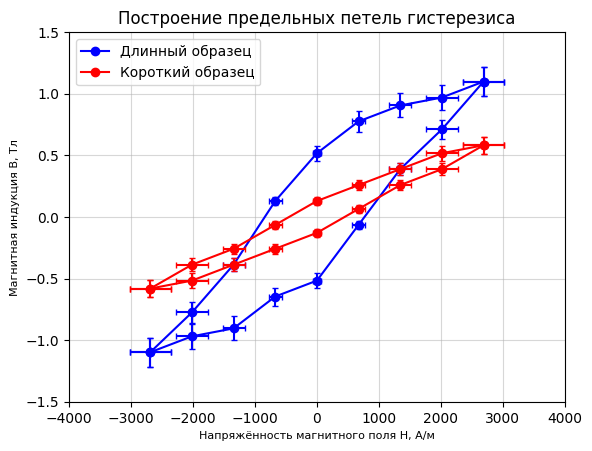

In [291]:
#Построение предельных петель гистерезиса
plt.title('Построение предельных петель гистерезиса')
plt.xlabel('Напряжённость магнитного поля Н, А/м', fontsize=8.)
plt.ylabel('Магнитная индукция B, Тл', fontsize=8.)

plt.xlim(-4000, 4000)
plt.ylim(-1.5, 1.5)

plt.plot(df2.loc[df2['length'] == 1, 'H'], df2.loc[df2['length'] == 1, 'B+'], '-b', marker='o', label='Длинный образец')
plt.plot(df2.loc[df2['length'] == 1, 'H'], df2.loc[df2['length'] == 1, 'B-'], '-b', marker='o')

plt.errorbar(
    df2.loc[df2['length'] == 1, 'H'], df2.loc[df2['length'] == 1, 'B+'],
    df2.loc[df2['length'] == 1, 'B+_error'], df2.loc[df2['length'] == 1, 'H_error'],
    '-b', capsize = 2, linestyle = ''
    )
plt.errorbar(
    df2.loc[df2['length'] == 1, 'H'], df2.loc[df2['length'] == 1, 'B-'],
    df2.loc[df2['length'] == 1, 'B-_error'], df2.loc[df2['length'] == 1, 'H_error'],
    '-b', capsize = 2, linestyle = ''
    )

plt.plot(df2.loc[df2['length'] == 0, 'H'], df2.loc[df2['length'] == 0, 'B+'], '-r', marker='o', label='Короткий образец')
plt.plot(df2.loc[df2['length'] == 0, 'H'], df2.loc[df2['length'] == 0, 'B-'], '-r', marker='o')

plt.errorbar(
    df2.loc[df2['length'] == 0, 'H'], df2.loc[df2['length'] == 0, 'B+'],
    df2.loc[df2['length'] == 0, 'B+_error'], df2.loc[df2['length'] == 0, 'H_error'],
    '-r', capsize = 2, linestyle = ''
    )
plt.errorbar(
    df2.loc[df2['length'] == 0, 'H'], df2.loc[df2['length'] == 0, 'B-'],
    df2.loc[df2['length'] == 0, 'B-_error'], df2.loc[df2['length'] == 0, 'H_error'],
    '-r', capsize = 2, linestyle = ''
    )

plt.grid(axis = 'x')
plt.legend(loc = 'best')
plt.grid(alpha = 0.5)
plt.savefig('Построение_предельных_петель_гистерезиса.png')
plt.show()